In [1]:
from brian2 import *


prefs.codegen.target = "numpy"

In [2]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf - g_na*INa + I)/Cm : volt
INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v-ENa) * m_s**3*h_s : volt
INaf = (v - ENa) * m_s**3 * h_f : volt
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/8)/(1 + exp(v/mV - 11)/10)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/16)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)

# gNas = 
run(10*ms)
group.I = 180*pA
run(200*ms)
group.I = 0 * pA
run(50*ms)

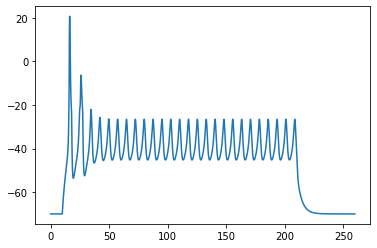

In [3]:
plot(stmon.t/ms, stmon.v[0]/mV)

# Equations 1.18_

In [6]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf - g_na*INa + I)/Cm : volt
INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v-ENa) * m_s**3*h_s : volt
INaf = (v - ENa) * m_s**3 * h_f : volt
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = exp(0.039*v/mV - 0.56)/ms : Hz
bms = exp(-0.049*v/mV - 2.53)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)


run(10*ms)
for cur in [80, 120, 180]*pA:
    group.I = cur
    run(70*ms)
    group.I = 0*pA
    run(20*ms)

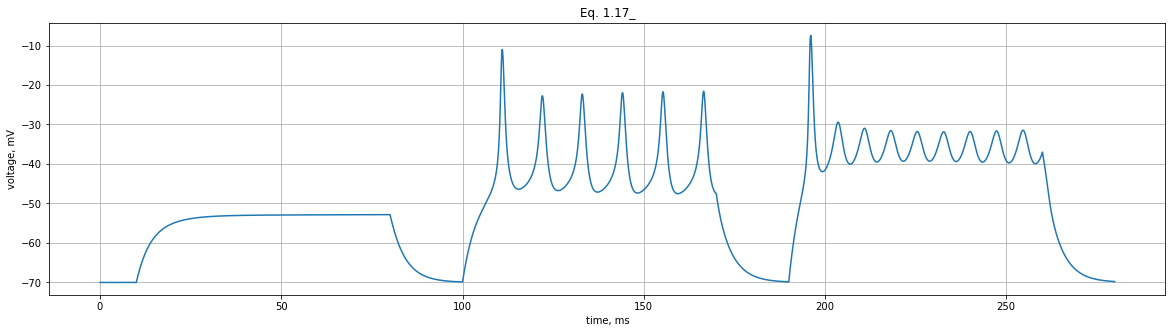

In [9]:
figure(figsize=(20, 5))
title("Eq. 1.17_")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

# Equation 1.18 

In [17]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf - g_na*INa + I)/Cm : volt
INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v-ENa) * m_s**3*h_s : volt
INaf = (v - ENa) * m_s**3 * h_f : volt
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 44)/8)/(1 + exp(v/mV - 7)/10)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 6))/16)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)


run(10*ms)
for cur in [80, 120, 180]*pA:
    group.I = cur
    run(70*ms)
    group.I = 0*pA
    run(20*ms)

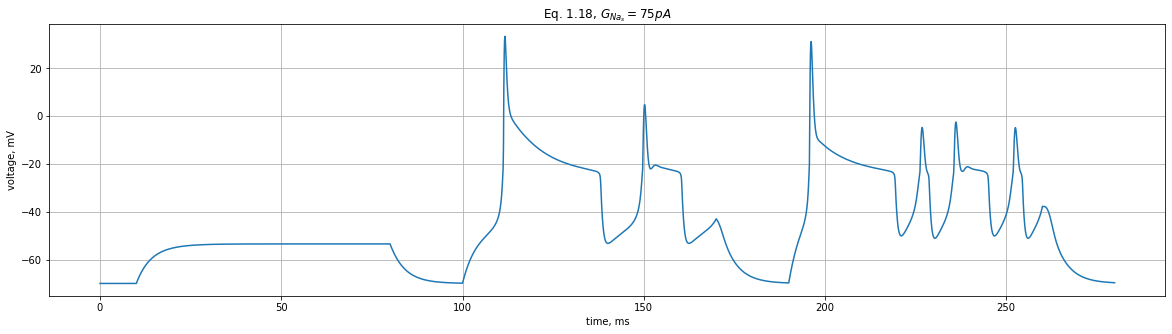

In [16]:
figure(figsize=(20, 5))
title("Eq. 1.18, $G_{Na_s}=75 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

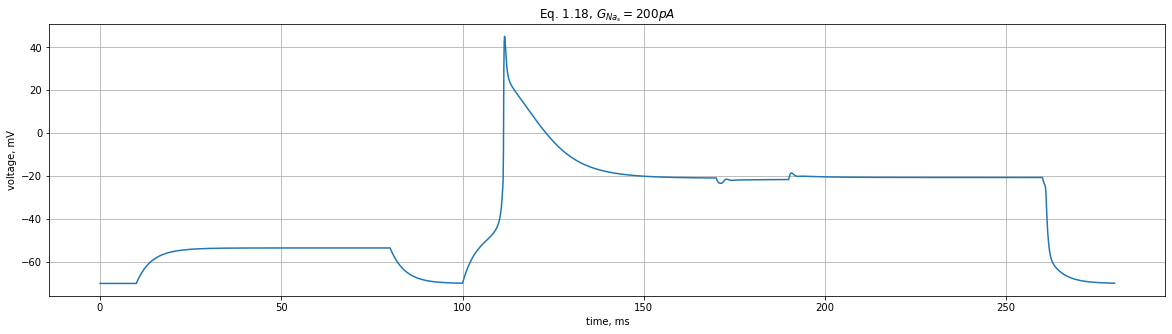

In [18]:
figure(figsize=(20, 5))
title("Eq. 1.18, $G_{Na_s}=200 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

# Equation 1.19 

In [21]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 200 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf - g_na*INa + I)/Cm : volt
INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v-ENa) * m_s**3*h_s : volt
INaf = (v - ENa) * m_s**3 * h_f : volt
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/9)/(1 + exp(v/mV - 11)/25)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/20)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)


run(10*ms)
for cur in [80, 120, 180]*pA:
    group.I = cur
    run(70*ms)
    group.I = 0*pA
    run(20*ms)

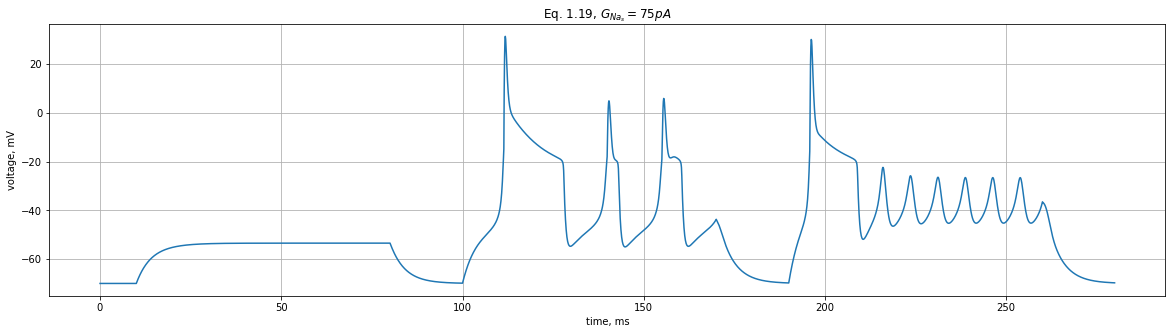

In [20]:
figure(figsize=(20, 5))
title("Eq. 1.19, $G_{Na_s}=75 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

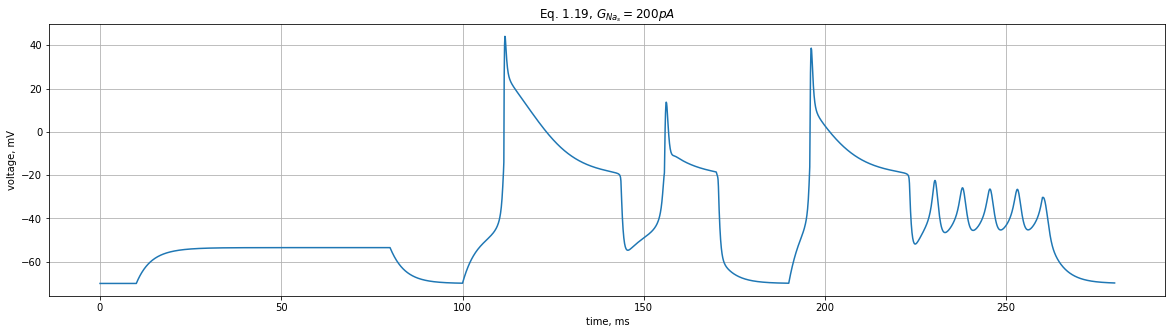

In [22]:
figure(figsize=(20, 5))
title("Eq. 1.19, $G_{Na_s}=200 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

# Equation 1.20 

In [40]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 200 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf - g_na*INa + I)/Cm : volt
INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v-ENa) * m_s**3 * h_s * r_s : volt
INaf = (v - ENa) * m_s**3 * h_f : volt

dr_s/dt = ars * (1 - r_s) - brs * r_s : 1
ars = 1e-4 * exp(-(v/mV + 8)/29)/ms + 8e-4/ms : Hz
brs = 3e-4 / (1 + 0.24*exp(-(v/mV + 23)/10))/ms : Hz

dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/9)/(1 + exp(v/mV - 11)/25)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/20)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)

'''
run(10*ms)
for cur in [80, 120, 180]*pA:
    group.I = cur
    run(70*ms)
    group.I = 0*pA
    run(20*ms)
'''
group.I = 220*pA
run(2000*ms)


Text(0, 0.5, 'voltage, mV')

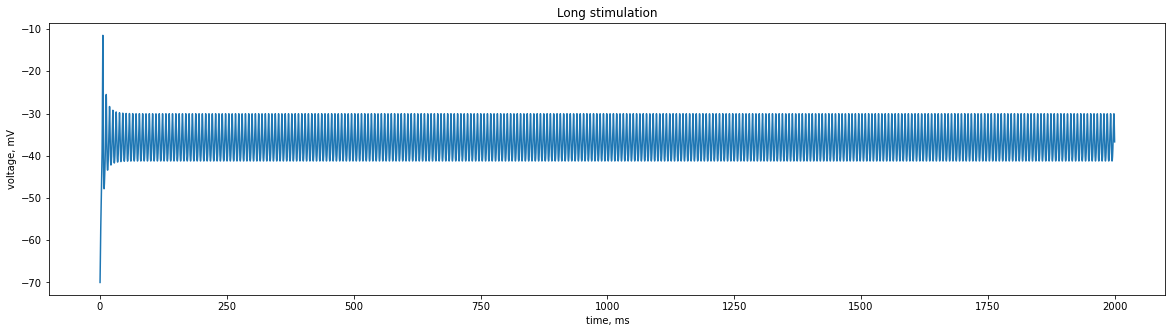

In [41]:
figure(figsize=(20, 5))
title("Long stimulation")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")

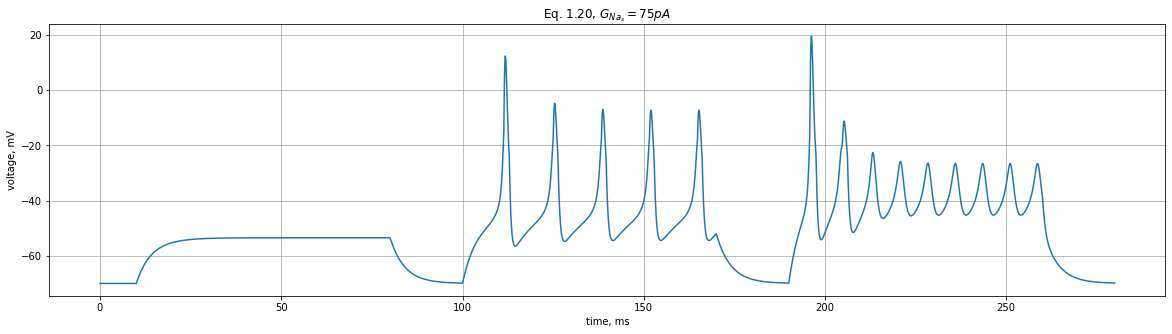

In [6]:
figure(figsize=(20, 5))
title("Eq. 1.20, $G_{Na_s}=75 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

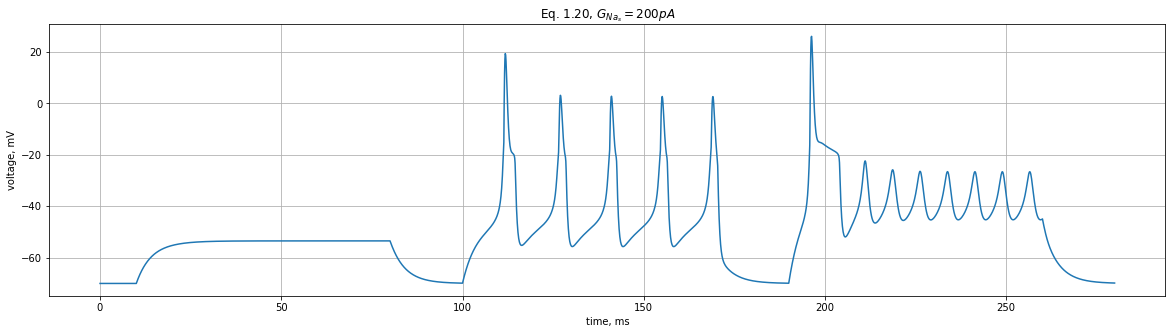

In [8]:
figure(figsize=(20, 5))
title("Eq. 1.20, $G_{Na_s}=200 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

# Attempt to exclude $I_{Na_s}$

In [37]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV  # was -63

# The model
eqs = Equations('''
#dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf + I)/Cm : volt
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_na*INa + I)/Cm : volt

INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v - ENa) * m_s**3 * h_s * r_s : volt
#INaf = (v - ENa) * m_s**3 * h_f : volt

dr_s/dt = ars * (1 - r_s) - brs * r_s : 1
ars = 1e-4 * exp(-(v/mV + 8)/29)/ms + 8e-4/ms : Hz
brs = 3e-4 / (1 + 0.24*exp(-(v/mV + 23)/10))/ms : Hz

dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/9)/(1 + exp(v/mV - 11)/25)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/20)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)


run(10*ms)
for cur in [80, 120, 180, 260]*pA:
    group.I = cur
    run(70*ms)
    group.I = 0*pA
    run(20*ms)

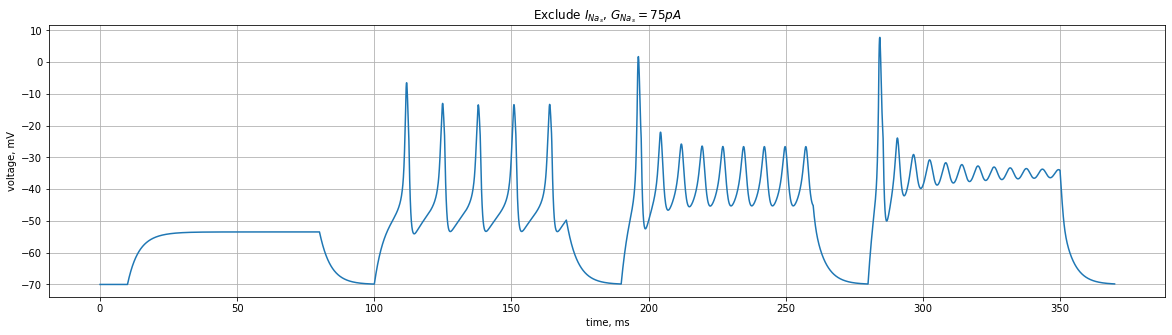

In [38]:
figure(figsize=(20, 5))
title("Exclude $I_{Na_s}$, $G_{Na_s}=75 pA$")
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("voltage, mV")
grid()

# 28 недель спустя

In [12]:
start_scope()
# Brian's equation with Krylov parameters
# Parameters
defaultclock.dt = 0.1*ms
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 200 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (-gl*(v-El) - g_kd*n**4*(v-EK) - g_nas*INas - g_naf*INaf + I)/Cm : volt

INas = (v-ENa) * m_s**3*h_s : volt
INaf = (v - ENa) * m_f**3 * h_f : volt
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp((v/mV + 40)/8))/(1 + exp((v/mV - 11)/10))/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2)/16))/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
dm_f/dt = amf * (1 - m_f) - bmf * m_f : 1
amf = exp(0.039*v/mV-0.56)/ms : Hz
bmf = exp(-0.049*v/mV - 2.53)/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
stmon = StateMonitor(group, 'v', True)

group.v = El
group.m_s = 0.5
group.m_f = 0.5
group.h_s = 0.5
group.h_f = 0.5
group.n = 0.5

# gNas = 
run(10*ms)
group.I =  180*pA
run(200*ms)
group.I = 0 * pA
run(50*ms)

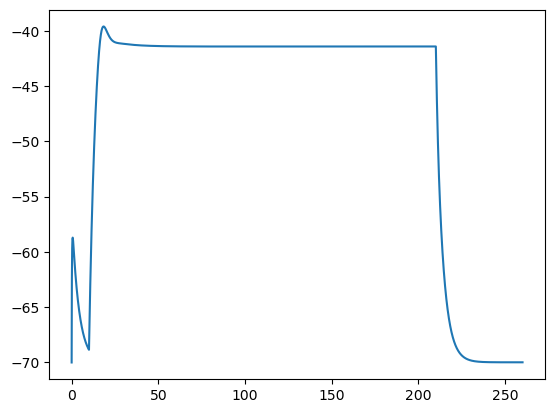

In [13]:
plot(stmon.t/ms, stmon.v[0]/mV)

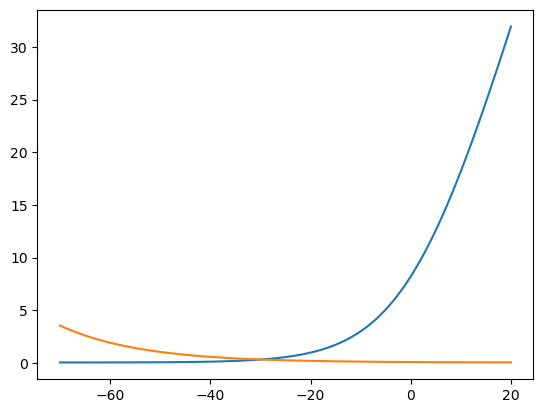

In [6]:
vv = linspace(-70, 20, 100)
amss = 0.05 * (1 + exp((vv + 44)/8))/(1 + exp((vv - 7)/10))
bms = 0.05 * (1 + exp(-(vv + 2)/16))
plot(vv, amss)
plot(vv, bms)